In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

from google.colab import files

In [ ]:
files.upload()

Saving bitcoin.csv to bitcoin.csv


In [ ]:
df = pd.read_csv('bitcoin.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [ ]:
df.describe() # общая статистика числовых данных

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


In [ ]:
#bitcoin.describe(include=['O']) # общая статистика нечисловых данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
1,False,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


In [ ]:
df.iloc[1243602]

Timestamp            1.399934e+09
Open                          NaN
High                          NaN
Low                           NaN
Close                         NaN
Volume_(BTC)                  NaN
Volume_(Currency)             NaN
Weighted_Price                NaN
Name: 1243602, dtype: float64

In [ ]:
df[df.Open.isnull()]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4856245,1617080940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4856308,1617084720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4856376,1617088800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4857340,1617146640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna(axis ='index') # удаляем строки с пропусками

In [ ]:
#df.fillna(method="ffill", inplace=True) #замена строк с пропусками
#df.isna().sum() 

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [ ]:
df.isnull()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,False,False,False,False,False,False,False,False
478,False,False,False,False,False,False,False,False
547,False,False,False,False,False,False,False,False
548,False,False,False,False,False,False,False,False
1224,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4857372,False,False,False,False,False,False,False,False
4857373,False,False,False,False,False,False,False,False
4857374,False,False,False,False,False,False,False,False
4857375,False,False,False,False,False,False,False,False


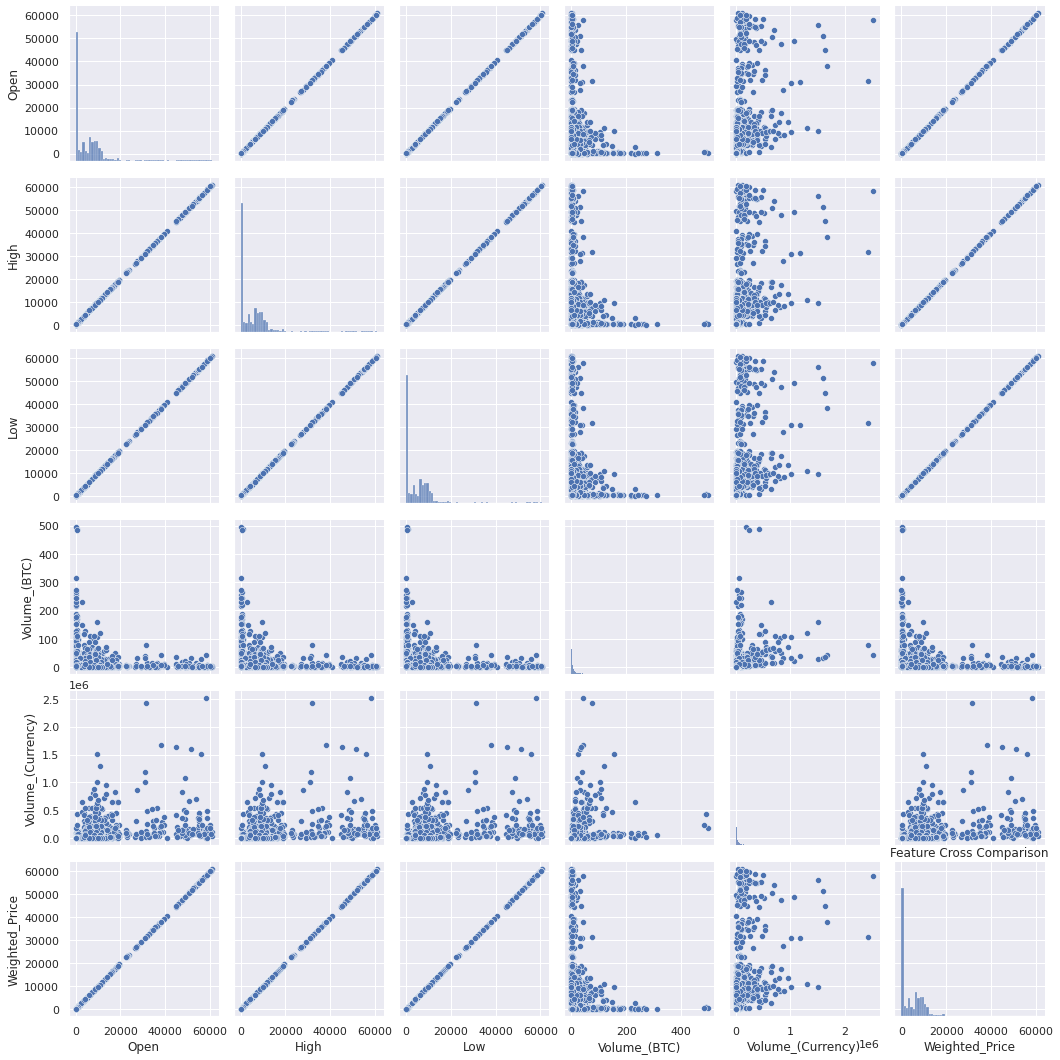

In [ ]:
features = ['Open', 'High', 'Low', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
target = 'Close'

sns.pairplot(df[features].sample(5000)) # Our dataset is too big to pairplot the whole thing
plt.title("Feature Cross Comparison")
plt.show()

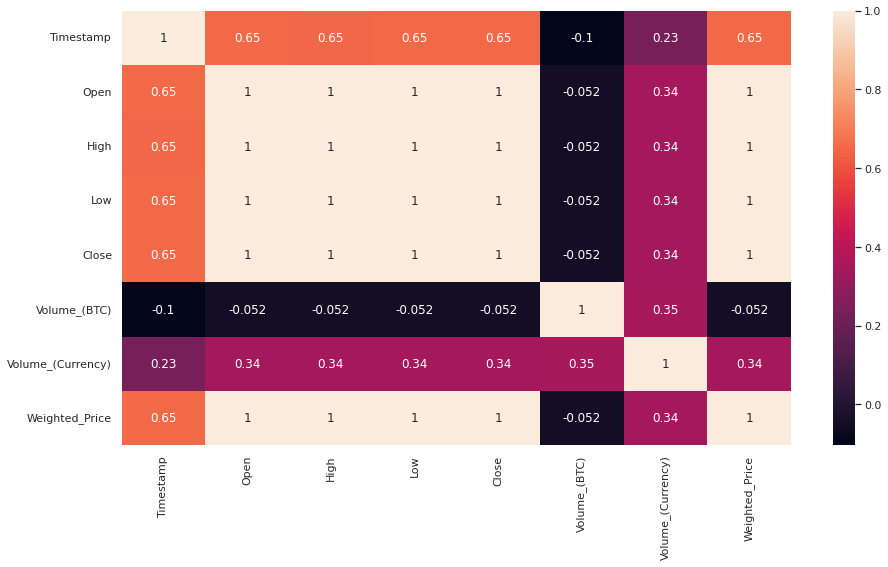

In [ ]:
sns.heatmap(df.corr(), annot=True) #значение коэффициента кореляции
plt.gcf().set_size_inches(15, 8)

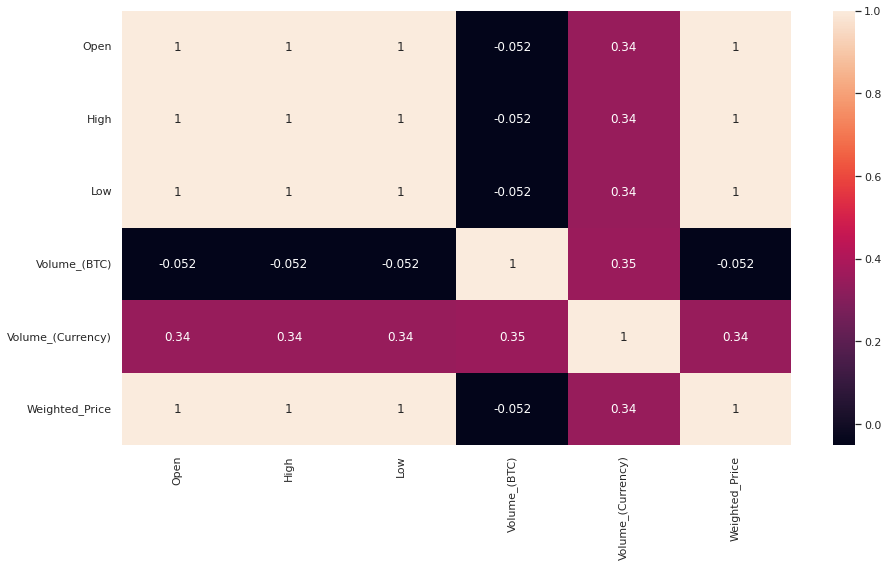

In [ ]:
sns.heatmap(df[features].corr(), annot=True)
plt.gcf().set_size_inches(15, 8)

In [ ]:
best_features = ['Open', 'High', 'Low', 'Volume_(Currency)', 'Weighted_Price']
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df[features], df[target], test_size = 0.3, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-4.79587241e-01,  6.63795487e-01,  5.73247378e-01, -1.17014826e-03,
        3.04662310e-07,  2.42501286e-01])

In [ ]:
model.score(x_train, y_train)

0.9999993578921335

In [ ]:
model.score(x_test, y_test)

0.9999993672423956

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, model.predict(x_train))

51.96129230838263

In [ ]:
mean_squared_error(y_test, model.predict(x_test))

51.22883156309806